## Population Trend

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing the dataset
df= pd.read_csv("Target_Population.csv")
df.head()

,Years,Target Population
0,2011,10543289
1,2012,10728970
2,2013,10902433
3,2014,11088234
4,2015,11250013


### Population Trend 2014-2023

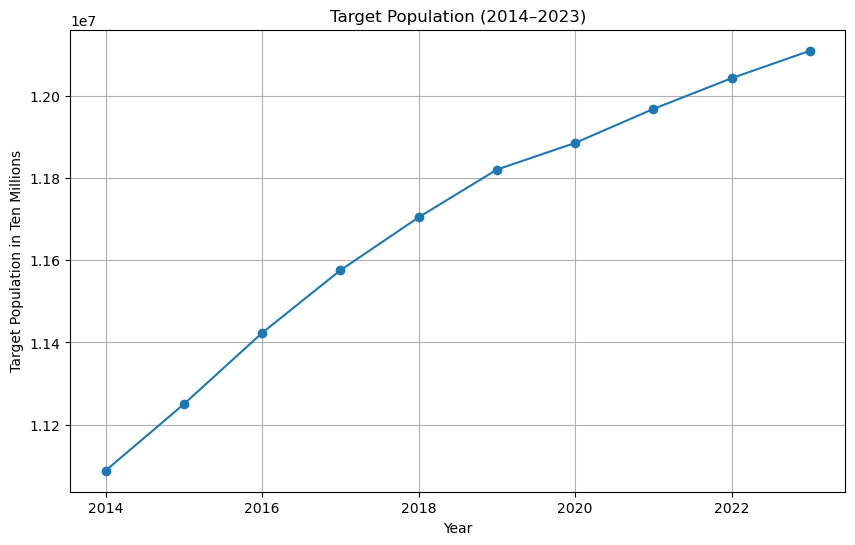

In [9]:
# Filter data from 2014 to 2024
df_filtered = df[(df["Years"] >= 2014) & (df["Years"] <= 2023)]

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_filtered["Years"], df_filtered["Target Population"], marker="o")
plt.title("Target Population (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Target Population in Ten Millions")
plt.grid(True)
plt.show()

### Regional Trend of Population

<Figure size 1200x700 with 0 Axes>

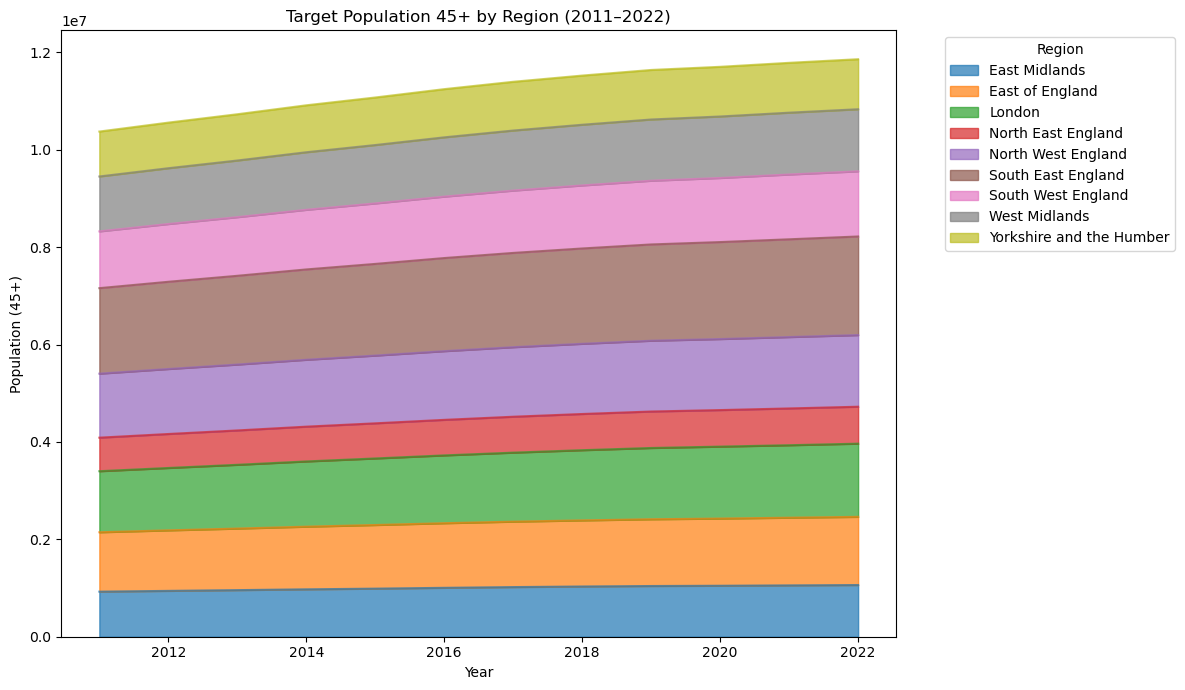

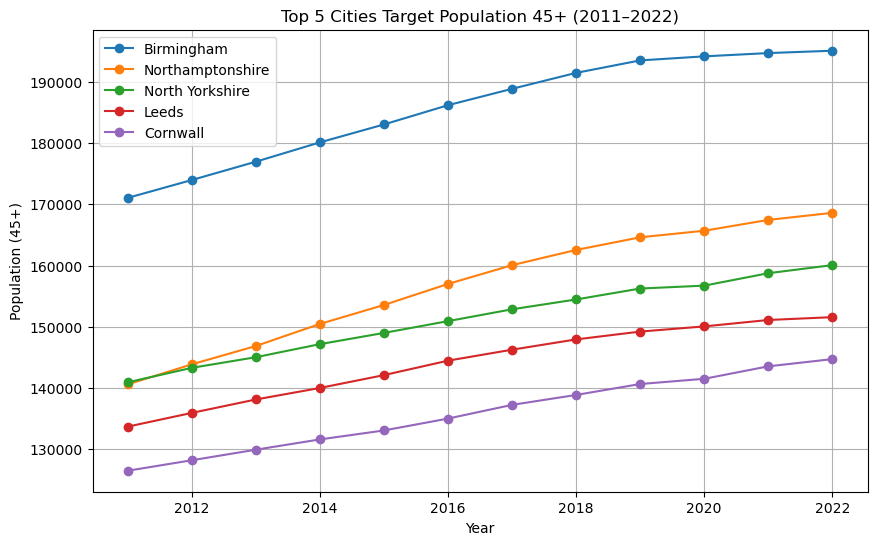

In [6]:
# Region-level trend plot (stacked area to show contribution by region over time)
region_pivot = region_trend.pivot(index="Year", columns="Region Name", values="Value").fillna(0)

plt.figure(figsize=(12,7))
region_pivot.plot.area(figsize=(12,7), alpha=0.7)
plt.title("Target Population 45+ by Region (2011–2022)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# City-level trend for top 5 cities
top5_cities = top_cities["City"].head(5).tolist()
city_trend = df_city_clean[df_city_clean["City"].isin(top5_cities)]
city_trend = city_trend.groupby(["Year", "City"])["Value"].sum().reset_index()

plt.figure(figsize=(10,6))
for city in top5_cities:
    subset = city_trend[city_trend["City"] == city]
    plt.plot(subset["Year"], subset["Value"], marker="o", label=city)

plt.title("Top 5 Cities Target Population 45+ (2011–2022)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

tbl_2022 = (
    region_trend.loc[region_trend["Year"] == 2022, ["Region Name", "Value"]]
    .groupby("Region Name", as_index=False)["Value"].sum()
    .sort_values("Value", ascending=False)
    .rename(columns={"Region Name": "Region", "Value": "Target Population 45+ (2022)"})
)

# Display (with commas) and optionally export
tbl_2022_style = tbl_2022.copy()
tbl_2022_style["Target Population 45+ (2022)"] = (
    tbl_2022_style["Target Population 45+ (2022)"].map("{:,}".format)
)
display(tbl_2022_style)

# Save if you like
tbl_2022.to_csv("target_pop_45plus_by_region_2022.csv", index=False)
tbl_2022.to_excel("target_pop_45plus_by_region_2022.xlsx", index=False)


,Region,Target Population 45+ (2022)
5,South East England,"2,024,497.0"
2,London,"1,502,864.0"
4,North West England,"1,471,499.0"
1,East of England,"1,400,343.0"
6,South West England,"1,338,324.0"
7,West Midlands,"1,274,884.0"
0,East Midlands,"1,061,510.0"
8,Yorkshire and the Humber,"1,027,309.0"
3,North East England,"758,628.0"


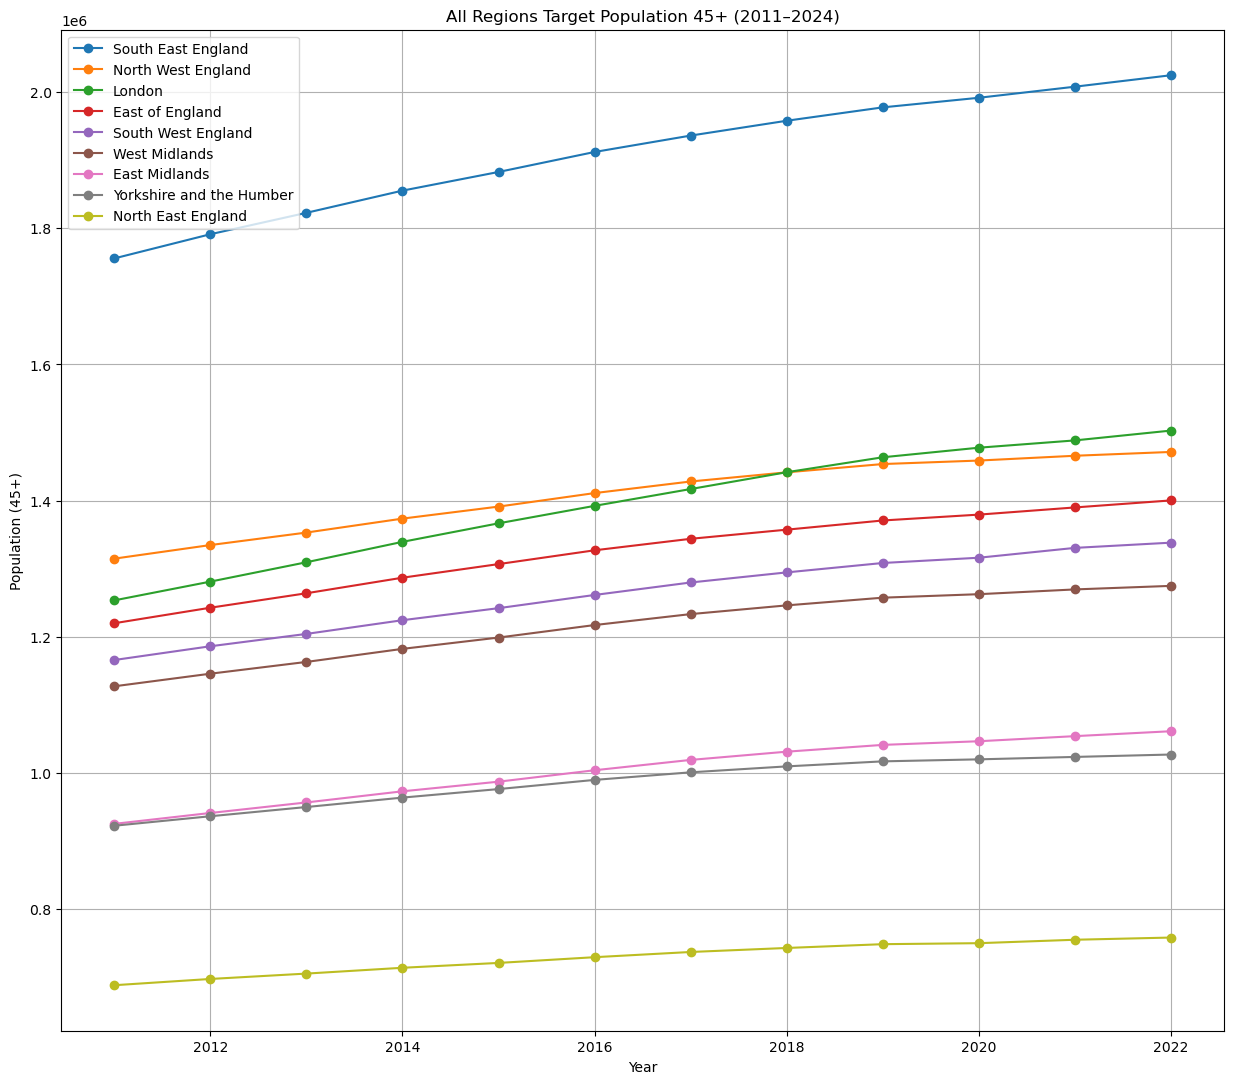

In [10]:
# Find top 5 regions by total population (2011–2024)
top_regions = region_trend.groupby("Region Name")["Value"].sum().sort_values(ascending=False).head(9).index.tolist()

# Filter for those top regions
region_trend_top5 = region_trend[region_trend["Region Name"].isin(top_regions)]

# Line plot: trends for top 5 regions
plt.figure(figsize=(15,13))
for region in top_regions:
    subset = region_trend_top5[region_trend_top5["Region Name"] == region]
    plt.plot(subset["Year"], subset["Value"], marker="o", label=region)

plt.title("All Regions Target Population 45+ (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend()
plt.grid(True)
plt.show()


